<a href="https://colab.research.google.com/github/capajaro/Data_Mining_Project-/blob/main/Mejor_Modelo_Lasso_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Visualization

In [ ]:
import numpy as np 
import pandas as pd
import os

import string
!pip install emoji
import emoji
import re

from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import backend as K
from tensorflow.keras.layers import Dense, Input
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub


# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud



# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

#For Stemming, NLTK is needed
import nltk
from nltk.stem.snowball import SnowballStemmer
# tools for text processing
import re
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

import spacy


     |████████████████████████████████| 133kB 3.9MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/capajaro/Data_Mining_Project-/main/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/capajaro/Data_Mining_Project-/main/test.csv')

Train dataset shape :  (7613, 5)
Test dataset shape :  (3263, 4)


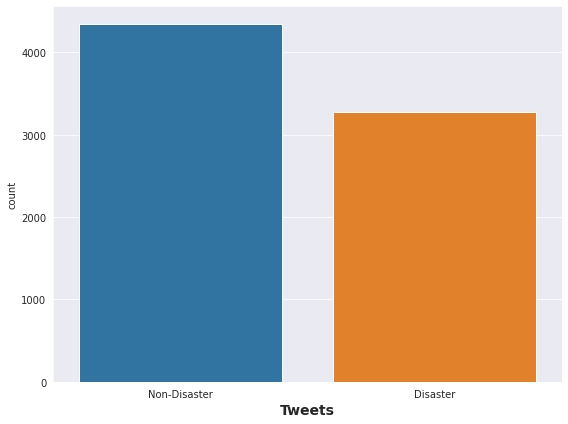

In [ ]:
print("Train dataset shape : ",df_train.shape)
print("Test dataset shape : ",df_test.shape)

disaster_tweets = df_train[df_train.target ==1]['text']
non_disaster_tweets = df_train[df_train.target ==1]['text']

#distribution reviews
sns.set_style("darkgrid")
plt.figure(num=10, figsize=(8, 6))
sns.countplot(x=df_train.target)
plt.xlabel('Tweets', fontweight='bold', fontsize= 14)
plt.xticks(ticks = [0,1], labels = ["Non-Disaster", "Disaster"])
plt.tight_layout()

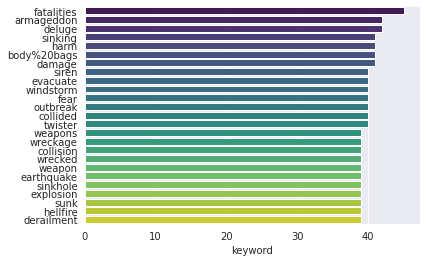

In [ ]:
df_train['keyword'].value_counts()
sns.barplot(y=df_train['keyword'].value_counts()[:25].index,x=df_train['keyword'].value_counts()[:25], orient='horizontal', palette='viridis')

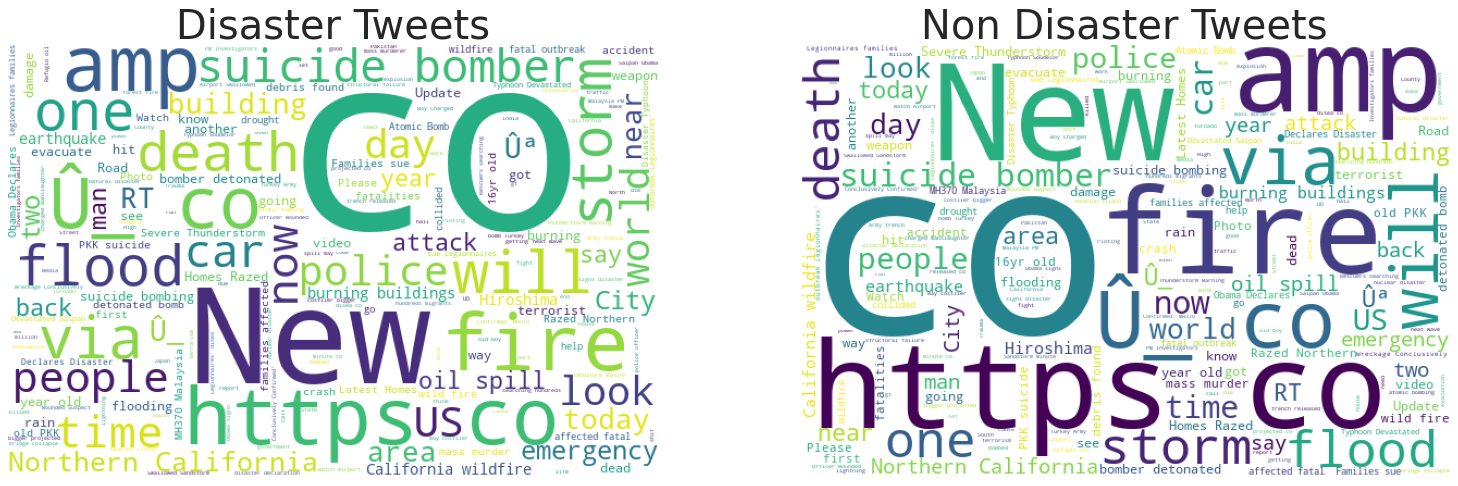

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(disaster_tweets))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(non_disaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);



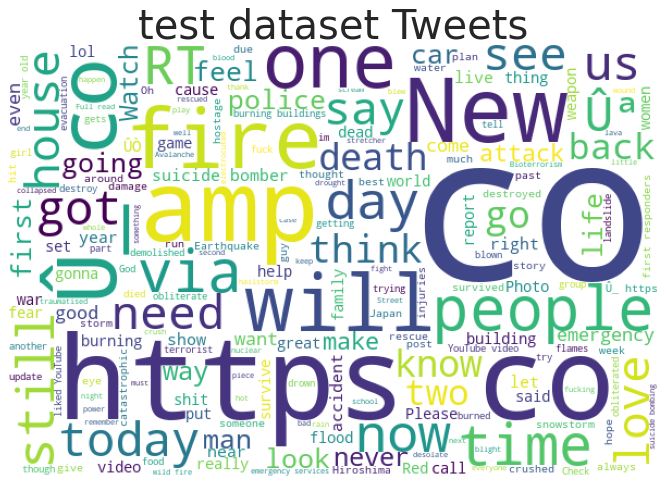

In [ ]:
fig, (ax3) = plt.subplots(1, 1, figsize=[26, 8])
wordcloud3 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(df_test.text))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('test dataset Tweets',fontsize=40);

# Create Model in _**R**_

In [2]:
# Activando R magic 
%load_ext rpy2.ipython

In [3]:
%%R 
if(!require(tidyverse)) install.packages('tidyverse')
if(!require(text2vec)) install.packages('text2vec')
if(!require(glmnet)) install.packages('glmnet')
if(!require(MLmetrics)) install.packages('MLmetrics')
if(!require(tm)) install.packages('tm')
if(!require(SnowballC)) install.packages('SnowballC')
if(!require(caTools)) install.packages('caTools')
if(!require(caret)) install.packages('caret')
if(!require(rpart)) install.packages('rpart')
if(!require(rpart.plot)) install.packages('rpart.plot')
if(!require(e1071)) install.packages('e1071')

library(e1071)
library(tidyverse)
library(text2vec) # text vectorization
library(glmnet) # building model cv.gmlnet()
library(MLmetrics) # F1_Score()
library(tm)
library(SnowballC)
library(caTools)
library(rpart)
library(rpart.plot)

R[write to console]: Loading required package: tidyverse

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: Loading required package: text2vec

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘float’, ‘RhpcBLASctl’, ‘RcppArmadillo’, ‘rsparse’, ‘mlapi’, ‘lgr’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/float_0.2-4.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1372759 bytes (1.3 MB)

R[write to

In [4]:
%%R 
tweets_test = read.csv('https://raw.githubusercontent.com/capajaro/Data_Mining_Project-/main/test.csv', stringsAsFactors=FALSE)
tweets = read.csv("https://raw.githubusercontent.com/capajaro/Data_Mining_Project-/main/train.csv", stringsAsFactors=FALSE)
submission = read.csv('https://raw.githubusercontent.com/capajaro/Data_Mining_Project-/main/sample_submission.csv', stringsAsFactors=FALSE)


## Preprocessing for modeling

In [5]:
%%R 
#Preprocessing
corpus = Corpus(VectorSource(tweets$text))
corpus = tm_map(corpus, tolower)
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, c(stopwords("english")))
corpus = tm_map(corpus, stemDocument)
Sparc = 0.995
frequencies = DocumentTermMatrix(corpus)
sparse = removeSparseTerms(frequencies, Sparc) 
tweetsSparse = as.data.frame(as.matrix(sparse))

colnames(tweetsSparse)= make.names(colnames(tweetsSparse))

target = as.factor(tweets$target)
id = tweets$id
tweetsSparse_Cluster = cbind(id,target,tweetsSparse)
tweetsSparse$target = as.factor(tweets$target)


## Runing Model

In [6]:
%%R

if(!require(caret)) install.packages('caret')
require(caret)
set.seed(123)

print('Creating Lassso Model')
#Create a new model with each Cluster
Model_Lasso <- train(
  target ~., data = tweetsSparse, method = "glmnet",
  trControl = trainControl("cv", number = 10),
  tuneLength = 10
)

print('Model Lasso Finished')


R[write to console]: Loading required package: caret

R[write to console]: Loading required package: lattice

R[write to console]: 
Attaching package: ‘caret’


R[write to console]: The following objects are masked from ‘package:MLmetrics’:

    MAE, RMSE


R[write to console]: The following object is masked from ‘package:purrr’:

    lift




[1] "Creating Lassso Model"
[1] "Model Lasso Finished"


## Using model on test

In [7]:
%%R
#Preprocessing
corpus_test = Corpus(VectorSource(tweets_test$text))
corpus_test = tm_map(corpus_test, tolower)
corpus_test = tm_map(corpus_test, removePunctuation)
corpus_test = tm_map(corpus_test, removeWords, c(stopwords("english")))
corpus_test = tm_map(corpus_test, stemDocument)

frequencies_test = DocumentTermMatrix(corpus_test)

tweetsSparse_test = as.data.frame(as.matrix(frequencies_test))

colnames(tweetsSparse_test)= make.names(colnames(tweetsSparse_test))


In [8]:
%%R

# Se predice con el CART MOdel en el Test Set
predict_test=predict(Model_Lasso,newdata=tweetsSparse_test)


## Saving File

In [9]:
%%R
# SAVE SUBMISSION FILE

submission['target'] = predict_test
write.csv(submission, 'Mejor_Modelo_Lasso.csv', row.names = FALSE)